# CNN model - Dataset containing only impersonal data. 

In [1]:
from numpy.random import seed
seed(1)
import numpy as np
from keras.models import load_model
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from src.utils import utils
from src.reporting import plot_confusion_matrix
%matplotlib inline

Using TensorFlow backend.


### Load dataset

In [2]:
print('Loading data...')
df = pd.read_csv('./data/cleaned_WISDM_v1')
print('Data loaded!')

Loading data...
Data loaded!


### Split dataset and targets on users (impersonal model)

In [3]:
# Read in cleaned data, removing erroneous column.
df = pd.read_csv('data/cleaned_WISDM_v1')

# Transform classes into numeric values and add one-hot-encoding and add concatenate to dataframe.
labels = np.unique(df['activity'])
df = utils.encode_labels(df, 'activity')
# Separate users so models can be made personal/impersonal etc.
unique_users = np.unique(df['user'])


# Separate users into different sets
cv_folds_users = np.array_split(unique_users, 5)

### Use sliding window to segment data

In [4]:
#Format data and window data.
window = 128
stride = 64

def format_data(data, labels, window_size, stride):
    '''
    :param data: Data to be formatted as numpy array.
    :param labels: Labels corresponding to data.
    :param window_size: Window size for each channel.
    :param stride: stride
    :return: array of shape (num_channels, num_samples, window_size)
    '''
    windowed_data = utils.sliding_window(data, (window_size, data.shape[1]), stride)
    # First index of shape used because in the process of windowing targets, one-hot-encoding should be kept the same.
    windowed_labels = utils.sliding_window(labels, (window_size, labels.shape[1]), stride)
    assert (windowed_data.shape[0] == windowed_labels.shape[0])
    formatted_data = utils.separate_windowed_channels(windowed_data, windowed_data.shape[-1])
    formatted_labels = utils.extract_labels(windowed_labels)
    assert formatted_data.shape[1] == formatted_labels.shape[0]
    formatted_data = formatted_data.reshape((formatted_data.shape[0],formatted_data.shape[1],formatted_data.shape[2],1))
    print('Number of samples: {}'.format(formatted_data.shape[1]))
    print('Data shape: {}'.format(formatted_data.shape))
    print('Data shape: {}'.format(formatted_labels.shape))
    return formatted_data, formatted_labels
    


Train users: [ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36]
Test users: [1 2 3 4 5 6 7 8]
Number of samples: 3599
Data shape: (3, 3599, 128, 1)
Data shape: (3599, 6)
Loading model for fold 0 ...
Model for fold 0 loaded!
F-measure score on test set:
             precision    recall  f1-score   support

          0       0.60      0.75      0.67       285
          1       0.94      0.85      0.89      1129
          2       0.99      0.98      0.99       179
          3       0.98      0.99      0.98       167
          4       0.49      0.62      0.55       330
          5       0.98      0.95      0.96      1509

avg / total       0.89      0.87      0.88      3599


Macro f-score (sci-kit learn implementation):0.838811507588014

Confusion matrix, without normalization


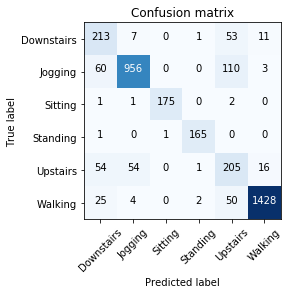

Train users: [ 1  2  3  4  5  6  7  8 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36]
Test users: [ 9 10 11 12 13 14 15]
Number of samples: 3366
Data shape: (3, 3366, 128, 1)
Data shape: (3366, 6)
Loading model for fold 1 ...
Model for fold 1 loaded!
F-measure score on test set:
             precision    recall  f1-score   support

          0       0.41      0.77      0.54       284
          1       0.96      0.99      0.98      1177
          2       0.80      0.96      0.87        54
          3       0.94      0.97      0.96        78
          4       0.60      0.70      0.65       411
          5       0.98      0.72      0.83      1362

avg / total       0.88      0.83      0.84      3366


Macro f-score (sci-kit learn implementation):0.8034345525087289

Confusion matrix, without normalization


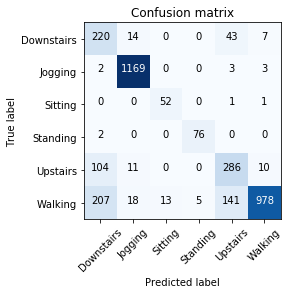

Train users: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 23 24 25 26 27 28 29 30 31 32
 33 34 35 36]
Test users: [16 17 18 19 20 21 22]
Number of samples: 3671
Data shape: (3, 3671, 128, 1)
Data shape: (3671, 6)
Loading model for fold 2 ...
Model for fold 2 loaded!
F-measure score on test set:
             precision    recall  f1-score   support

          0       0.61      0.88      0.72       352
          1       0.96      0.98      0.97       938
          2       1.00      0.86      0.92       378
          3       0.82      0.99      0.90       224
          4       0.83      0.58      0.69       454
          5       0.96      0.94      0.95      1325

avg / total       0.91      0.89      0.89      3671


Macro f-score (sci-kit learn implementation):0.8578817377319258

Confusion matrix, without normalization


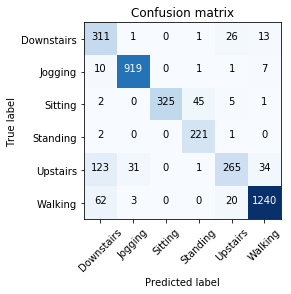

Train users: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 30 31 32
 33 34 35 36]
Test users: [23 24 25 26 27 28 29]
Number of samples: 2999
Data shape: (3, 2999, 128, 1)
Data shape: (2999, 6)
Loading model for fold 3 ...
Model for fold 3 loaded!
F-measure score on test set:
             precision    recall  f1-score   support

          0       0.84      0.64      0.73       306
          1       0.95      0.97      0.96      1060
          2       0.96      0.57      0.72        80
          3       0.69      0.97      0.81        79
          4       0.66      0.77      0.71       350
          5       0.95      0.94      0.95      1124

avg / total       0.90      0.89      0.89      2999


Macro f-score (sci-kit learn implementation):0.8129675592601604

Confusion matrix, without normalization


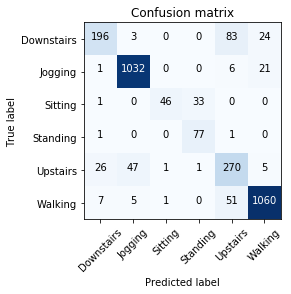

Train users: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]
Test users: [30 31 32 33 34 35 36]
Number of samples: 3517
Data shape: (3, 3517, 128, 1)
Data shape: (3517, 6)
Loading model for fold 4 ...
Model for fold 4 loaded!
F-measure score on test set:
             precision    recall  f1-score   support

          0       0.65      0.87      0.74       339
          1       0.99      0.96      0.97      1042
          2       0.78      0.99      0.87       244
          3       0.93      0.66      0.77       208
          4       0.88      0.65      0.75       379
          5       0.94      0.94      0.94      1305

avg / total       0.91      0.90      0.90      3517


Macro f-score (sci-kit learn implementation):0.8428487486313592

Confusion matrix, without normalization


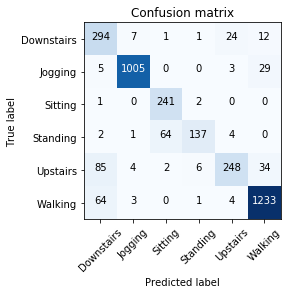

In [5]:

model_path = 'models/5_fold_cross_validations_models/'
models = [
            'multi_cnn3_all_conv_model_05_Jan_2018_14:38:14_fold_0',
            'multi_cnn3_all_conv_model_05_Jan_2018_14:38:14_fold_1',
            'multi_cnn3_all_conv_model_05_Jan_2018_14:38:14_fold_2',
            'multi_cnn3_all_conv_model_05_Jan_2018_14:38:14_fold_3',
            'multi_cnn3_all_conv_model_05_Jan_2018_14:38:14_fold_4'
         ]

conf_matrices =[]
macro_avg_accum = 0

for fold in range(len(cv_folds_users)):
    test_users = cv_folds_users[fold]
    # Training users are those not in the test user set. 
    train_users = np.setdiff1d(unique_users, test_users)
    print('Train users: {}\nTest users: {}'.format(train_users, test_users))
    train, test = utils.split_data_on_users(df, train_users, test_users)
    target_train, target_test  = utils.one_hot_cols_as_arrays(labels, train, test)

    test, target_test = format_data(np.array(test[['x', 'y', 'z']]),target_test,window,stride)

    test_x, test_y, test_z = test
    
    
    print('Loading model for fold {} ...'.format(fold)) 
    model = load_model(model_path+models[fold])
    print('Model for fold {} loaded!'.format(fold))
    
    # Predict based on test set.
    probs = model.predict([test_x, test_y, test_z])
    # Class is the index with the largest probability
    y_pred= probs.argmax(-1)
    # target_test is the index with 1 (largest value)
    y_true = target_test.argmax(-1)
    
    # Predict based on test set.
    probs = model.predict([test_x, test_y, test_z])
    # Class is the index with the largest probability
    y_pred= probs.argmax(-1)
    # target_test is the index with 1 (largest value)
    y_true = target_test.argmax(-1)
    
    
    # Reporting
    report = classification_report(y_true,y_pred)
    print('F-measure score on test set:\n{}\n'.format(report))

    metric_macro = precision_recall_fscore_support(y_true, y_pred, average='macro', beta=1)
    # Index 2 contains macro f scores.
    print('Macro f-score (sci-kit learn implementation):{}\n'.format(metric_macro[2]))
    macro_avg_accum+=metric_macro[2]
    # Confusion matrix
    conf_mat = confusion_matrix(y_true,y_pred)
    conf_matrices.append(conf_mat)
    plot_confusion_matrix(conf_mat, labels)

In [6]:
agreg_conf_mat = np.sum(conf_matrices, axis=0)
agreg_conf_mat 

array([[1234,   32,    1,    3,  229,   67],
       [  78, 5081,    0,    1,  123,   63],
       [   5,    1,  839,   80,    8,    2],
       [   8,    1,   65,  676,    6,    0],
       [ 392,  147,    3,    9, 1274,   99],
       [ 365,   33,   14,    8,  266, 5939]])

Confusion matrix, without normalization


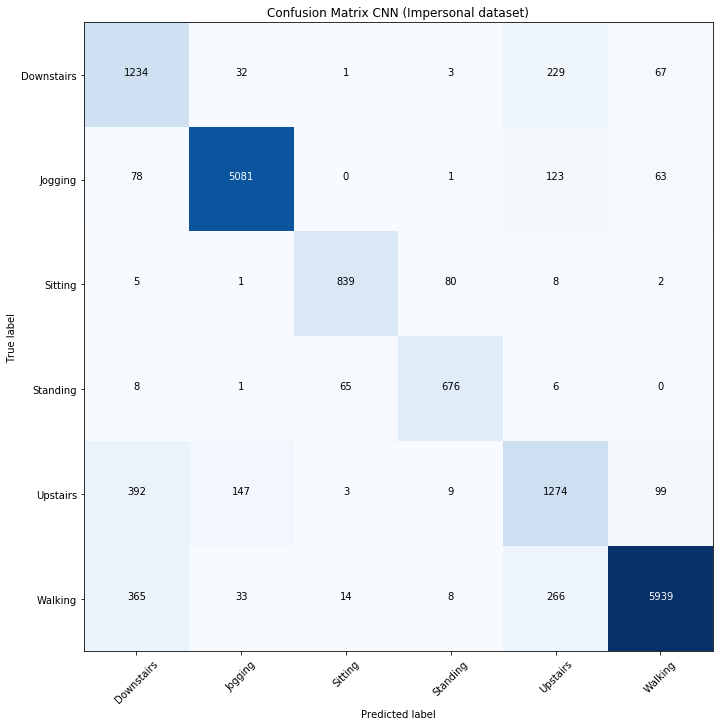

Average Macro F-score:  0.831188821144


In [7]:
plt.figure(figsize=(20,10))
plot_confusion_matrix(agreg_conf_mat, labels, title='Confusion Matrix CNN (Impersonal dataset)')
print('Average Macro F-score: ', macro_avg_accum/5)